# Step 1:  Scrape the extra data from a related HTML pages.

In [1]:
!pip install wordcloud
!pip install missingno

# Installing important libraries

In [2]:
# import libraries to be used

import numpy as np
import pandas as pd
from collections import Counter #  a class that counts occurrences of elements in a collection.
import matplotlib.pyplot as plt
import matplotlib.style as style # libraries for creating visualizations in Python.
from matplotlib.colors import ListedColormap #classes for creating color maps for visualizations.
from matplotlib import cm
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
from plotly import tools #libraries for creating interactive and web-based visualizations.
from wordcloud import WordCloud, ImageColorGenerator #libraries for creating word clouds.
import warnings #module for handling warnings in Python.
import missingno as mn #library for visualizing missing data in Python.

# supress warnings

warnings.filterwarnings('ignore')

In [3]:
# load dataset into a data frame

df_vgame = pd.read_csv('video-games.csv')

# display the first 5 records on the dataframe

df_vgame.head()

Rank                             Name Platform    Year   Genre  \
0   349        Pro Evolution Soccer 2008      PS2  2007.0  Sports   
1   441                   FIFA Soccer 08      PS2  2007.0  Sports   
2   615   PES 2009: Pro Evolution Soccer      PS2  2008.0  Sports   
3   266  Metal Gear Solid 3: Snake Eater      PS2  2004.0  Action   
4   703                   FIFA Soccer 09      PS2  2008.0  Sports   

                      Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0  Konami Digital Entertainment      0.05      0.00      0.64         2.93   
1               Electronic Arts      0.68      0.00      0.00         2.46   
2  Konami Digital Entertainment      0.13      0.07      0.26         2.05   
3  Konami Digital Entertainment      1.46      0.00      0.83         1.93   
4               Electronic Arts      0.38      0.07      0.01         1.82   

   Global_Sales  
0          3.63  
1          3.14  
2          2.50  
3          4.23  
4          2.28

In [4]:
# get dataframe dimensions

print("Database dimension     :",df_vgame.shape)
print("Database size          :",df_vgame.size)

# get info about the dataframe (columns,entries,datatype etc...)

df_vgame.info()

# describe the dataframe and get statistics

df_vgame.describe()

Database dimension     : (16398, 11)
Database size          : 180378
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16398 entries, 0 to 16397
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16398 non-null  int64  
 1   Name          16398 non-null  object 
 2   Platform      16398 non-null  object 
 3   Year          16128 non-null  float64
 4   Genre         16398 non-null  object 
 5   Publisher     16340 non-null  object 
 6   NA_Sales      16398 non-null  float64
 7   EU_Sales      16398 non-null  float64
 8   JP_Sales      16398 non-null  float64
 9   Other_Sales   16398 non-null  float64
 10  Global_Sales  16398 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16398.000000  16128.000000  16398.000000  16398.000000  16398.000000   
mean    8400.618734   2006.422495      0.208235      0.111264      0.061514   
std     4734.102136      5.807750      0.373560      0.241583      0.198082   
min      201.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4301.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8400.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12499.750000   2010.000000      0.230000      0.100000      0.030000   
max    16600.000000   2020.000000      4.210000      3.750000      4.870000   

        Other_Sales  Global_Sales  
count  16398.000000  16398.000000  
mean       0.037186      0.418486  
std        0.094071      0.667460  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.030000      0.460000  
max        2.930000      5.070000

<Axes: >

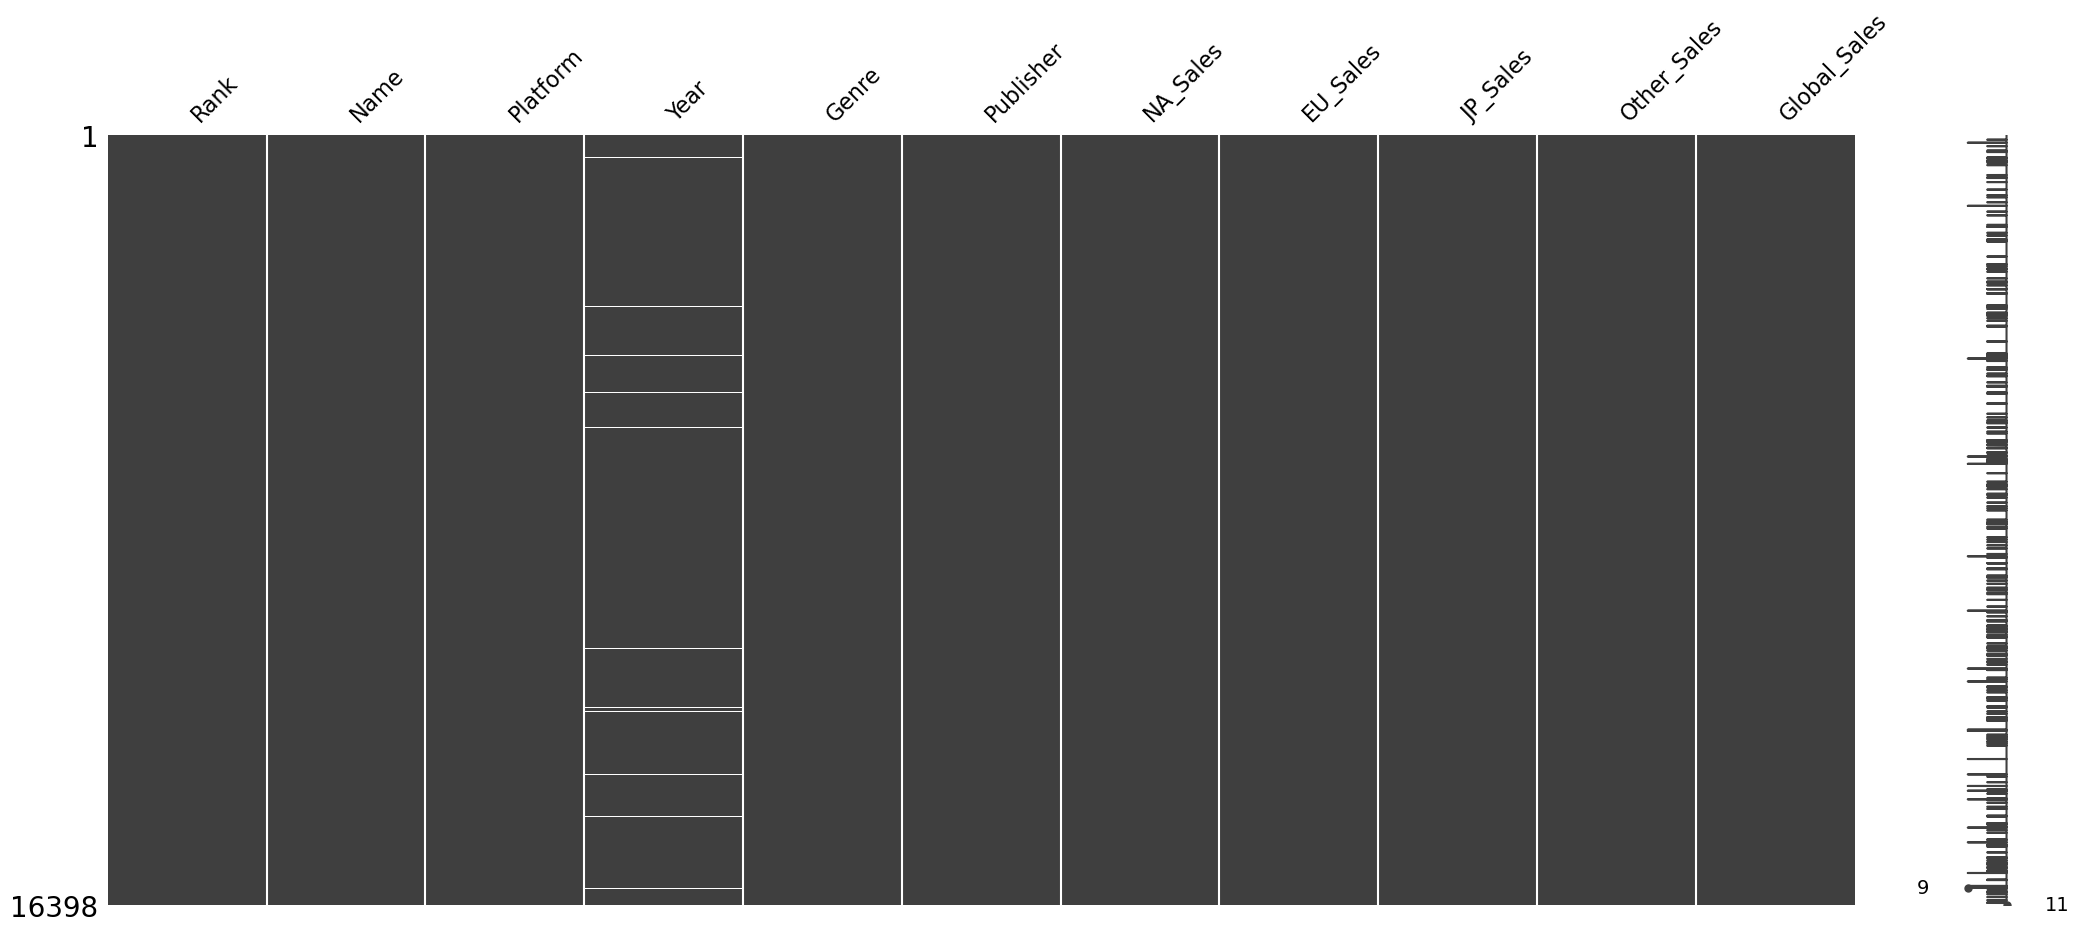

In [5]:
# Lets take a look at the dataframe to check null values

mn.matrix(df_vgame)

# Step 2: - Clean and tidy the messy scraped data.

In [6]:
# Data Cleaning
# count number null values in each column

null_value_perc = pd.DataFrame((df_vgame.isnull().sum())*100/df_vgame.shape[0]).reset_index()
null_value_perc.columns = ['Column Name', 'Null Values Percentage']
null_value = pd.DataFrame(df_vgame.isnull().sum()).reset_index()
null_value.columns = ['Column Name', 'No. of Null Values']
null_vgd = pd.merge(null_value, null_value_perc, on='Column Name')
null_vgd

Column Name  No. of Null Values  Null Values Percentage
0           Rank                   0                0.000000
1           Name                   0                0.000000
2       Platform                   0                0.000000
3           Year                 270                1.646542
4          Genre                   0                0.000000
5      Publisher                  58                0.353702
6       NA_Sales                   0                0.000000
7       EU_Sales                   0                0.000000
8       JP_Sales                   0                0.000000
9    Other_Sales                   0                0.000000
10  Global_Sales                   0                0.000000

In [7]:
# get the number of unique game names with missing year 

game_missedyear = df_vgame[df_vgame['Year'].isnull()]["Name"].unique()
print("num of unique game year missing : ",len(game_missedyear))

# impute missing year

df_vgame['Year'] = df_vgame['Year'].fillna(2009.0)

# check if correct imputation occured

df_vgame['Year'].isnull().sum()

num of unique game year missing :  232


0

In [8]:
# change year to integer

df_vgame['Year']=df_vgame['Year'].astype('int')
df_vgame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16398 entries, 0 to 16397
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16398 non-null  int64  
 1   Name          16398 non-null  object 
 2   Platform      16398 non-null  object 
 3   Year          16398 non-null  int32  
 4   Genre         16398 non-null  object 
 5   Publisher     16340 non-null  object 
 6   NA_Sales      16398 non-null  float64
 7   EU_Sales      16398 non-null  float64
 8   JP_Sales      16398 non-null  float64
 9   Other_Sales   16398 non-null  float64
 10  Global_Sales  16398 non-null  float64
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 1.3+ MB


In [9]:
# get number of games with missing publisher

print("Total Publisher missing values ", df_vgame['Publisher'].isnull().sum(),' rows')

# drop thesse values as they only sold once and sell value is insignificant

df_vgame = df_vgame.dropna()

# check if records were dropped

df_vgame.isnull().sum()

Total Publisher missing values  58  rows


Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [10]:
# Visualization

# lets get the dataframe statistics indepth

games =df_vgame['Name'].unique()
publishers = df_vgame['Publisher'].unique()
platforms = df_vgame['Platform'].unique()
game_type = df_vgame['Genre'].unique()

print("Number of Games: ",len(games))
print("Publishers: ",len(publishers))
print("Platforms: ",len(platforms))
print("Game Types: ",len(game_type))



Number of Games:  11333
Publishers:  578
Platforms:  31
Game Types:  12


In [11]:
# Video Game Sales by Year

year_sale =  df_vgame.groupby('Year')['Global_Sales'].sum().reset_index()

# Total Game Sales by year

fig = go.Figure(go.Bar(x=year_sale['Year'],y=year_sale['Global_Sales'],marker={'color': year_sale['Global_Sales'],'colorscale': 'Viridis'}))
fig.update_layout(title_text='Video Game Global Sales by Release Year',xaxis_title="Year",yaxis_title="Sum of Sales")
fig.show()

In [12]:
# Top 10 video game publishers

publisher =  df_vgame.groupby('Publisher')['Name'].count().reset_index()
publisher = publisher.sort_values('Name',ascending=False).reset_index()
publisher.drop("index",axis = 1,inplace=True)

fig = go.Figure(go.Bar(x=publisher['Publisher'],y=publisher['Name'][:10],marker={'color': publisher['Name'][:10],'colorscale': 'Viridis'}))
fig.update_layout(title_text='Video Game Top 10 Publishers',xaxis_title="Publisher Name",yaxis_title="number of games published")
fig.show()



In [13]:
# Top 10 Video Game Sales Globally by Publisher

publisher =  df_vgame.groupby('Publisher')['Global_Sales'].sum().reset_index()
publisher = publisher.sort_values('Global_Sales',ascending=False).reset_index()
publisher.drop("index",axis = 1,inplace=True)

fig = go.Figure(go.Bar(x=publisher['Publisher'],y=publisher['Global_Sales'][:10],marker={'color': publisher['Global_Sales'][:10],'colorscale': 'Viridis'}))
fig.update_layout(title_text='Video Game Top 10 Publishers by Global sales',xaxis_title="Publisher Name",yaxis_title="Number of Global sales")
fig.show()


In [14]:
# Top 5 Publishers per Region Representation

EU = df_vgame.pivot_table('EU_Sales', columns='Publisher', aggfunc='sum').T
EU = EU.sort_values(by='EU_Sales', ascending=False).iloc[0:5]
EU_publishers = EU.index

JP = df_vgame.pivot_table('JP_Sales', columns='Publisher', aggfunc='sum').T
JP = JP.sort_values(by='JP_Sales', ascending=False).iloc[0:5]
JP_publishers = JP.index

NA = df_vgame.pivot_table('NA_Sales', columns='Publisher', aggfunc='sum').T
NA = NA.sort_values(by='NA_Sales', ascending=False).iloc[0:5]
NA_publishers = NA.index

Other = df_vgame.pivot_table('Other_Sales', columns='Publisher', aggfunc='sum').T
Other = Other.sort_values(by='Other_Sales', ascending=False).iloc[0:5]
Other_publishers = Other.index

Global = df_vgame.pivot_table('Global_Sales', columns='Publisher', aggfunc='sum').T
Global = Global.sort_values(by='Global_Sales', ascending=False).iloc[0:5]
Global_publishers = Global.index

fig = go.Figure()
fig.update_layout(xaxis_title="Publisher Name",yaxis_title="Number of sales")

# Adding Traces

fig.add_trace(
    go.Bar(y=EU['EU_Sales'],
           x=EU_publishers,
           name="Europe",
           marker={'color': EU['EU_Sales'],'colorscale': 'Portland'},
           visible=False))

fig.add_trace(
    go.Bar(y=NA['NA_Sales'],
           x=NA_publishers,
           name="North America",
          marker={'color': NA['NA_Sales'],'colorscale': 'Portland'}))
fig.add_trace(
    go.Bar(y=JP['JP_Sales'],
           x=JP_publishers,
           name="Japan",
           marker={'color': JP['JP_Sales'],'colorscale': 'Portland'},
           visible=False))

fig.add_trace(
    go.Bar(y=Other['Other_Sales'],
           x=Other_publishers,
           name="Others",
           marker={'color': Other['Other_Sales'],'colorscale': 'Portland'},
           visible=False))

fig.add_trace(
    go.Bar(y=Global['Global_Sales'],
           x=Global_publishers,
           name="Global",
           marker={'color': Global['Global_Sales'],'colorscale': 'Portland'},
               visible=False ))

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=0.57,
            y=1.2,
            buttons=list([
                dict(label="North America",
                     method="update",
                     args=[{"visible": [True, False,False, False, False]},
                           {"title": "Top 5 Publishers for North America"}]),
                dict(label="Europe",
                     method="update",
                     args=[{"visible": [False,True, False, False, False]},
                           {"title": "Top 5 Publishers for Europe"}]),
                dict(label="Japan",
                     method="update",
                     args=[{"visible": [False,False, True, False, False]},
                           {"title": "Top 5 Publishers for Japan"}]),
                dict(label="Others",
                     method="update",
                     args=[{"visible": [False,False, False, True, False]},
                           {"title": "Top 5 Publishers for Other Region"}]),
                dict(label="Global",
                     method="update",
                     args=[{"visible": [False,False, False, False, True]},
                           {"title": "Top 5 Publishers for Global"}]),
            ]),
        )
    ])

# Setting the title
fig.update_layout(
    title_text="Top 5 Publishers per region",
    xaxis_domain=[0.05, 1.0]
)

fig.show()



In [15]:
# Top 10 video games by Platform

publisher =  df_vgame.groupby('Platform')['Name'].count().reset_index()
publisher = publisher.sort_values('Name',ascending=False).reset_index()
publisher.drop("index",axis = 1,inplace=True)

fig = go.Figure(go.Bar(x=publisher['Platform'],y=publisher['Name'],marker={'color': publisher['Name'],'colorscale': 'Bluered'}))
fig.update_layout(title_text='Video Games vs Platform',xaxis_title="Platform Name",yaxis_title="number of games published")
fig.show()



In [16]:
# Genre vs Game Sales

genre = df_vgame.loc[:,['Genre','Global_Sales']]
genre['total_sales'] = genre.groupby('Genre')['Global_Sales'].transform('sum')
genre.drop('Global_Sales', axis=1, inplace=True)
genre = genre.drop_duplicates()

fig = px.pie(genre, names='Genre', values='total_sales', template='seaborn')
fig.update_traces(rotation=90, textinfo="percent+label")
fig.update_layout(title="Genre Game Sales",title_x=0.5)
fig.show()

In [17]:
# display Video Game Count by Genre

game_genre =  df_vgame.groupby('Genre')['Name'].count().reset_index().sort_values("Name",ascending=False)
game_genre = game_genre.reset_index()
game_genre.drop("index",axis = 1,inplace=True)

fig = go.Figure([go.Pie(labels=game_genre['Genre'], values=game_genre['Name'],hole=0.2)])  
fig.update_traces(hoverinfo='label+percent+value', textinfo='percent', textfont_size=15)
fig.update_layout(title="Genre vs Number of games Published",title_x=0.1)
fig.show()

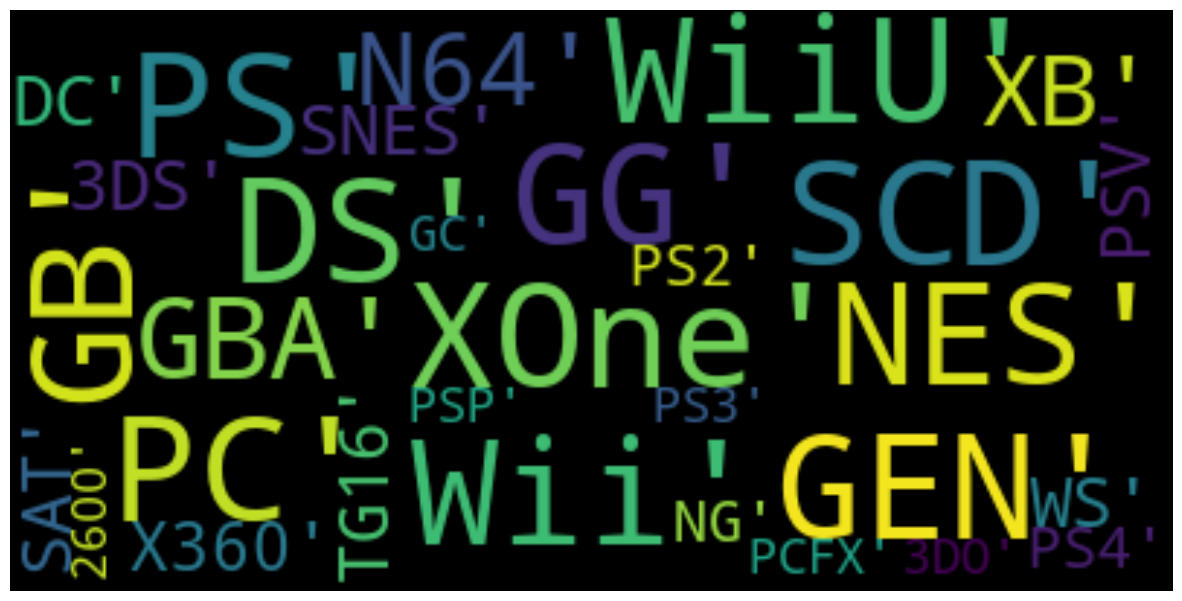

In [18]:
# Word cloud for Platform 

text = list(set(df_vgame['Platform']))
plt.rcParams['figure.figsize'] = (15,15)
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="black").generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

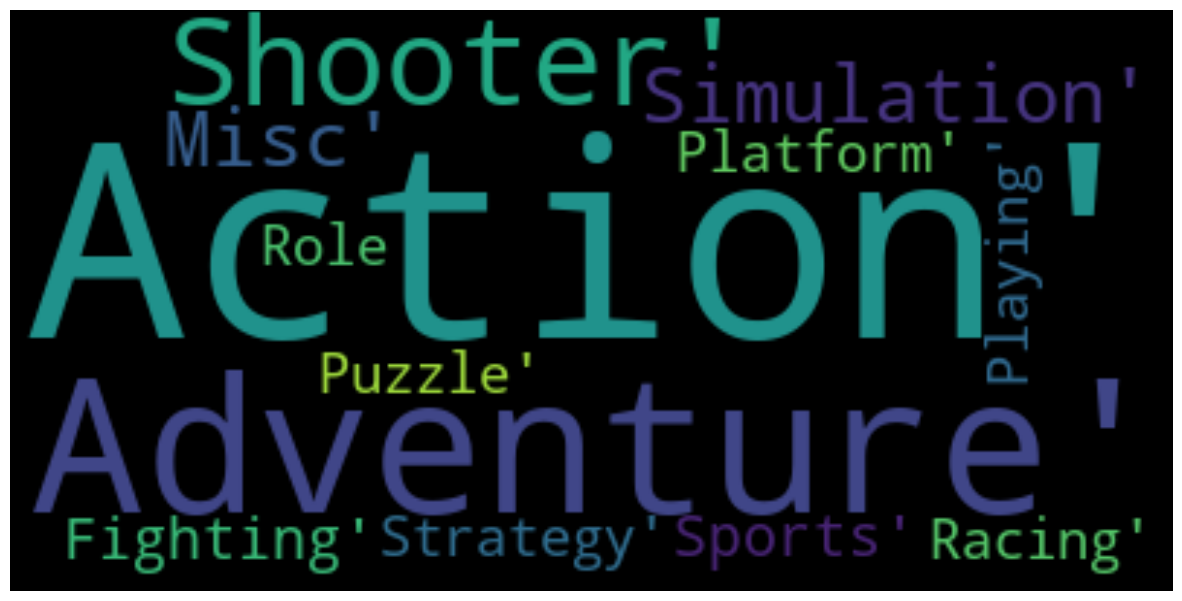

In [19]:
# word count for Genre

text = list(set(df_vgame['Genre']))
plt.rcParams['figure.figsize'] = (15,15)
wordcloud = WordCloud(max_font_size=100, max_words=1000,background_color="black").generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [20]:
# Year wise total sale

perc = df_vgame[["Year",'NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
perc[['NA_mean','EU_mean','JP_mean','Other_mean']] = perc.groupby('Year')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].transform('sum')
perc.drop(['NA_Sales','EU_Sales','JP_Sales','Other_Sales'], axis=1, inplace=True)
perc = perc.drop_duplicates()
perc = perc.sort_values("Year")
df_vgame1 = pd.DataFrame({'Place': ['NA_Sales']*perc.shape[0], 'Year':perc['Year'], 'Sales': perc['NA_mean']})
df_vgame2 = pd.DataFrame({'Place': ['EU_Sales']*perc.shape[0], 'Year':perc['Year'], 'Sales': perc['EU_mean']})
df_vgame3 = pd.DataFrame({'Place': ['JP_Sales']*perc.shape[0], 'Year':perc['Year'], 'Sales': perc['JP_mean']})
df_vgame4 = pd.DataFrame({'Place': ['Other_Sales']*perc.shape[0], 'Year':perc['Year'], 'Sales': perc['Other_mean']})
final = pd.concat([df_vgame1,df_vgame2,df_vgame3,df_vgame4], axis=0)
final = final.sort_values("Year")
fig=px.bar(final,x='Place', y="Sales", animation_frame="Year",animation_group="Place", color="Place", hover_name="Place",range_y=[0,200])
fig.update_layout(title="Year Wise Total Sale",title_x=0.5)
fig.show()

   # Step 3

### Integrate all relevant datasets (scraped and main), considering the best matching between the two data sets, and discuss any possible data loss as result of integration.


In [21]:
# Load the main dataset
df_main = pd.read_csv('vgsales.csv')

# Load the scraped dataset
df_scraped = pd.read_csv('video-games.csv')


In [22]:
# Explore the datasets

print("vgsales:")
print(df_main.head())
print("\nvideo-games:")
print(df_scraped.head())

vgsales:
   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  

video-games:
   Rank                             Name Platform    Year   Genre  \
0   349        Pro Evolution Soccer 2008      PS2  2007.0  Sports   
1   

In [23]:
# Check columns in main csv and scraped csv
print("Columns in df_main: ", df_main.columns)
print("Columns in df_scraped: ", df_scraped.columns)


Columns in df_main:  Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')
Columns in df_scraped:  Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')


In [24]:
# Identify the common columns
common_columns = ['Publisher', 'Publisher']

In [25]:
# Perform the merge, merge type = outer
df_merged = pd.merge(df_main, df_scraped, on=common_columns, how='outer')

In [26]:
# Validating data loss and checking them after merging
original_rows = len(df_main) + len(df_scraped)
merged_rows = len(df_merged)
data_loss = original_rows - merged_rows
print(f"Data loss after merging: {data_loss} rows")

Data loss after merging: -8120322 rows


In [27]:
# Save the merged dataset
df_merged.to_csv('merged_dataset.csv', index=False)

# Step 4: Use the integrated data set to answer the remaining questions, supported with necessary visualizations
